<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/states/daily"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv"

#https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/
#csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv
dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [48]:
dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(),\
  ['state', 'positive', 'negative']].sort_values(by='positive', ascending=False).head(10)

,state,positive,negative
37,NY,113704,169917
34,NJ,34124,41232
24,MI,14225,11893
20,LA,12496,46002
5,CA,12026,101674
21,MA,11736,57064
10,FL,11111,90956
16,IL,10357,43224
41,PA,10017,60013
52,WA,6966,75633


In [0]:
gbUSA = dfCovidtracking.groupby(['date'])
gbCA = dfCovidtracking[dfCovidtracking.state=='CA'].groupby(['date'])

dfUSAPos = gbUSA.positive.sum().reset_index().copy()
dfCAPos = gbCA.positive.sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 
dfUSAPos['PCT']= dfUSAPos.positive/dfUSAPos.max().positive
dfCAPos['PCT']=dfCAPos.positive/dfCAPos.max().positive

In [50]:
dfUSAPos[-7:]

,date,positive,PCT
25,2020-03-29,139061,0.454812
26,2020-03-30,160530,0.525028
27,2020-03-31,184683,0.604023
28,2020-04-01,210816,0.689493
29,2020-04-02,239099,0.781995
30,2020-04-03,271988,0.889562
31,2020-04-04,305755,1.000000


In [51]:
dfCAPos[-7:]

,date,positive,PCT
25,2020-03-29,5708,0.474638
26,2020-03-30,6447,0.536088
27,2020-03-31,7482,0.622152
28,2020-04-01,8155,0.678114
29,2020-04-02,9191,0.764261
30,2020-04-03,10701,0.889822
31,2020-04-04,12026,1.000000


In [52]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-03-31,184683,864201,59518,14236.0,26660.0,3402.0,3644.0,69.0,507.0,5666.0,3746,26660.0,1108402,1048884,1048884,807.0,4357.0,79877.0,24153.0,104030.0
2020-04-01,210816,939190,59669,16223.0,31142.0,3837.0,4270.0,71.0,676.0,7084.0,4700,31142.0,1209675,1150006,1150006,954.0,4482.0,74989.0,26133.0,101122.0
2020-04-02,239099,1028649,62101,17157.0,32649.0,4264.0,541.0,67.0,661.0,8586.0,5784,32649.0,1329849,1267748,1267748,1084.0,4335.0,89459.0,28283.0,117742.0
2020-04-03,271988,1135356,61980,19926.0,35991.0,4686.0,593.0,70.0,728.0,10422.0,6962,35991.0,1469324,1407344,1407344,1178.0,3509.0,106707.0,32889.0,139596.0
2020-04-04,305755,1318052,15573,22158.0,38402.0,5207.0,691.0,656.0,154.0,12784.0,8314,38402.0,1639380,1623807,1623807,1352.0,4404.0,182696.0,33767.0,216463.0


In [53]:
gbCA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-03-31,7482,21772,57400,1617.0,1617.0,657.0,657.0,0.0,0.0,0.0,153,1617.0,86654,29254,29254,20.0,185.0,1223.0,1035.0,2258.0
2020-04-01,8155,21772,57400,1855.0,1855.0,774.0,774.0,0.0,0.0,0.0,171,1855.0,87327,29927,29927,18.0,238.0,0.0,673.0,673.0
2020-04-02,9191,23809,59500,1922.0,0.0,816.0,0.0,0.0,0.0,0.0,203,0.0,92500,33000,33000,32.0,0.0,2037.0,1036.0,3073.0
2020-04-03,10701,24599,59500,2188.0,0.0,901.0,0.0,0.0,0.0,0.0,237,0.0,94800,35300,35300,34.0,0.0,790.0,1510.0,2300.0
2020-04-04,12026,101674,13000,2300.0,0.0,1008.0,0.0,0.0,0.0,0.0,276,0.0,126700,113700,113700,39.0,0.0,77075.0,1325.0,78400.0


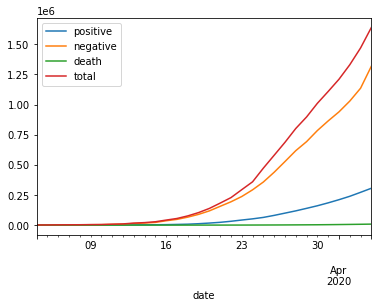

In [54]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

In [55]:
dfWHO[-14:]

,confirmed,who_deaths
date,,
2020-03-22,15219,201
2020-03-23,31573,402
2020-03-24,42164,471
2020-03-25,51914,673
2020-03-26,63570,884
2020-03-27,68334,991
2020-03-28,85228,1243
2020-03-29,103321,1668
2020-03-30,122653,2112


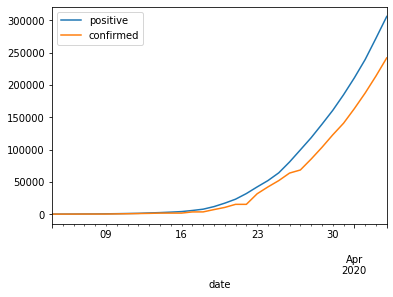

In [56]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

In [57]:
gbCA.sum()[-7:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-03-29,5708,20549,64400,1034.0,1034.0,410.0,410.0,0.0,0.0,0.0,123,1034.0,90657,26257,26257,22.0,0.0,0.0,1065.0,1065.0
2020-03-30,6447,20549,64400,1432.0,1432.0,597.0,597.0,0.0,0.0,0.0,133,1432.0,91396,26996,26996,10.0,398.0,0.0,739.0,739.0
2020-03-31,7482,21772,57400,1617.0,1617.0,657.0,657.0,0.0,0.0,0.0,153,1617.0,86654,29254,29254,20.0,185.0,1223.0,1035.0,2258.0
2020-04-01,8155,21772,57400,1855.0,1855.0,774.0,774.0,0.0,0.0,0.0,171,1855.0,87327,29927,29927,18.0,238.0,0.0,673.0,673.0
2020-04-02,9191,23809,59500,1922.0,0.0,816.0,0.0,0.0,0.0,0.0,203,0.0,92500,33000,33000,32.0,0.0,2037.0,1036.0,3073.0
2020-04-03,10701,24599,59500,2188.0,0.0,901.0,0.0,0.0,0.0,0.0,237,0.0,94800,35300,35300,34.0,0.0,790.0,1510.0,2300.0
2020-04-04,12026,101674,13000,2300.0,0.0,1008.0,0.0,0.0,0.0,0.0,276,0.0,126700,113700,113700,39.0,0.0,77075.0,1325.0,78400.0


In [58]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    308850
dead           8407
dtype: int64

In [59]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    12837
dead           289
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [61]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                308850
Spain             126168
Italy             124632
Germany            96092
France             90848
China              82543
Iran               55743
United Kingdom     42477
Turkey             23934
Switzerland        20505
Name: confirmed, dtype: int64

In [0]:
dfData = dfCovidtracking.groupby('date')

In [0]:
dfStateTotal = dfCovidtracking[['state', 'positive']].groupby(by='state').max() \
.rename(columns={'positive':'current_total'})


In [0]:
dfState = dfCovidtracking[['date','state','positive']].set_index('state') \
  .join(dfStateTotal)

In [0]:
dfState['pct']=dfState.positive/dfState.current_total

In [66]:
dfState.loc['FL'].head(7)

,date,positive,current_total,pct
state,,,,
FL,2020-04-04,11111,11111,1.000000
FL,2020-04-03,9585,11111,0.862659
FL,2020-04-02,8010,11111,0.720907
FL,2020-04-01,6955,11111,0.625956
FL,2020-03-31,6338,11111,0.570426
FL,2020-03-30,5473,11111,0.492575
FL,2020-03-29,4246,11111,0.382144


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

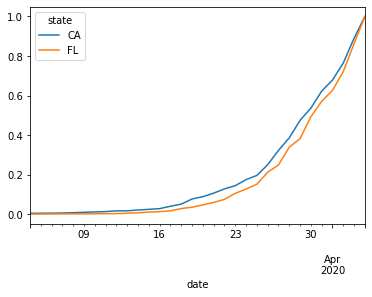

In [68]:
x = res.loc[:, ['CA','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

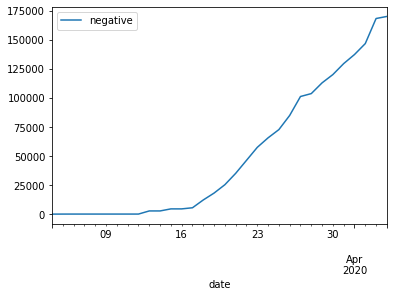

In [70]:
x = dfNYTesting.plot.line()

In [71]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['FL']))].head(10)

,state,date,positive,current_total,pct
294,FL,2020-04-04,11111,11111,1.000000
295,FL,2020-04-03,9585,11111,0.862659
296,FL,2020-04-02,8010,11111,0.720907
297,FL,2020-04-01,6955,11111,0.625956
298,FL,2020-03-31,6338,11111,0.570426
299,FL,2020-03-30,5473,11111,0.492575
300,FL,2020-03-29,4246,11111,0.382144
301,FL,2020-03-28,3763,11111,0.338673
302,FL,2020-03-27,2765,11111,0.248852
303,FL,2020-03-26,2355,11111,0.211952


In [72]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=3)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .66)].sort_values(by='positive',ascending=False)


,state,date,positive,current_total,pct
1004,NJ,2020-04-01,22255,34124,0.652180
712,MI,2020-04-01,9334,14225,0.656169
620,MA,2020-04-01,7738,11736,0.659339
297,FL,2020-04-01,6955,11111,0.625956
591,LA,2020-04-01,6424,12496,0.514085
1220,PA,2020-04-01,5805,10017,0.579515
1391,TX,2020-04-01,3997,6110,0.654173
501,IN,2020-04-01,2565,3953,0.648874
652,MD,2020-04-01,1985,3125,0.635200
880,NC,2020-04-01,1584,2402,0.659450


In [73]:
datecutoff

Timestamp('2020-04-01 00:00:00')

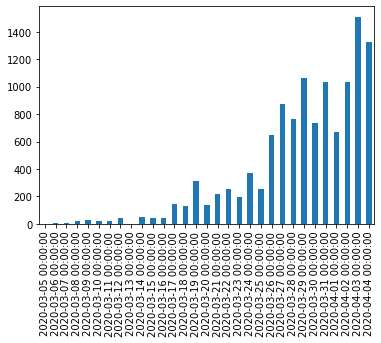

In [74]:
state = 'CA'
dfState = dfCovidtracking[dfCovidtracking.state==state].sort_values(by='date')
vals = dfState.positive.values

x=pd.Series([y-x for x,y in zip(vals,vals[1:])], \
          index = dfCovidtracking[dfCovidtracking.state==state]\
          .sort_values(by='date').date.values[1:] ) \
          .plot.bar()



# Added State Data

In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [77]:
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending','death', 'total']].sum()
print(res)
print(f"Current Infection Rate {res.positive/res.total*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")

positive     305755
negative    1318052
pending       15573
death          8314
total       1639380
dtype: int64
Current Infection Rate 18.650648%
Percentage of US affected: 0.095683%


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfState = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfState['ABBR']=dfState.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfState = dfState.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfState.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfState)

In [149]:
((dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100).sort_values(ascending=False)

state
NY    0.584489
NJ    0.384185
LA    0.268801
MA    0.170272
CT    0.147982
MI    0.142437
DC    0.127807
WA    0.091479
IL    0.081733
PA    0.078246
RI    0.076084
VT    0.073880
CO    0.072464
DE    0.060898
IN    0.058718
GA    0.058018
ID    0.056685
NV    0.056556
FL    0.051733
MD    0.051690
MS    0.048889
TN    0.048630
UT    0.044542
NH    0.039714
MO    0.037328
SC    0.037233
WI    0.036273
ME    0.033923
WY    0.032311
AL    0.032224
OH    0.031987
CA    0.030436
OK    0.029290
VA    0.028200
AZ    0.027738
IA    0.024912
MT    0.024795
AR    0.024621
ND    0.024407
SD    0.023964
KS    0.023959
NM    0.023607
AK    0.023375
NC    0.022902
HI    0.022530
OR    0.021315
TX    0.021072
KY    0.018600
NE    0.016594
WV    0.015735
MN    0.015338
PR    0.014153
AS         NaN
GU         NaN
MP         NaN
VI         NaN
dtype: float64